In [2]:
pip install pandas numpy scikit-learn lightgbm matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [9]:
data = pd.read_csv('IBM2017.csv')
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2017-04-17  25.139999  25.139999  25.139999  25.139999  23.982637       0
1  2017-04-18  25.139999  25.139999  25.139999  25.139999  23.982637       0
2  2017-04-19  25.250000  25.250000  25.250000  25.250000  24.087582    2000
3  2017-04-20  25.240000  25.240000  25.240000  25.240000  24.078035    6300
4  2017-04-21  25.240000  25.240000  25.240000  25.240000  24.078035       0


In [10]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [11]:
# Extract temporal features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

In [12]:
# Prepare features and target variable
# Use temporal features and 'Volume' as features
X = data[['Year', 'Month', 'Day', 'Volume']]
y = data['Close']  # Target: closing price

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [15]:
# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [20]:
# Fix for the LightGBM training function
model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data], callbacks=[lgb.early_stopping(stopping_rounds=100)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 4
[LightGBM] [Info] Start training from score 25.364247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [21]:

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [22]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0277693808201407


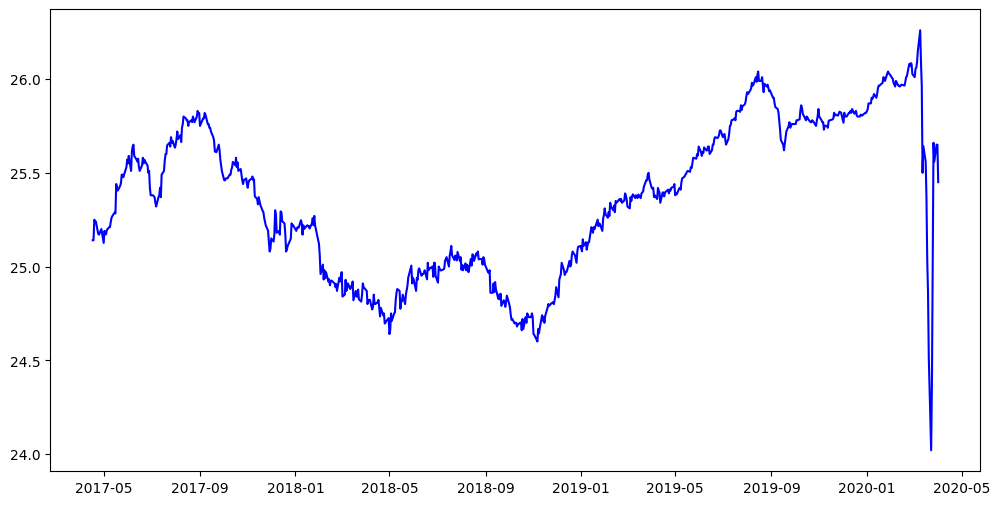

In [23]:
# Plot for visualization of results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')

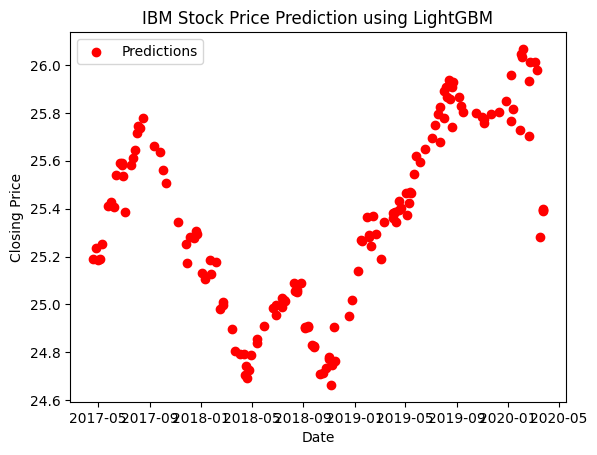

In [24]:
# Scatter plot of predictions on the test set
plt.scatter(X_test.index, y_pred, color='red', label='Predictions')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using LightGBM')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Use !pip install to ensure that the necessary libraries (pandas, numpy, scikit-learn, lightgbm, matplotlib) are installed. If you're running this in a Jupyter notebook or Google Colab, you can use this installation command. Otherwise, install the libraries using pip in your terminal.

    Load the Data:
        Read the IBM stock data from a CSV file.

    Convert Dates and Extract Features:
        Convert the Date column to datetime format and set it as the index.
        Extract temporal features (Year, Month, Day) and include the Volume feature.

    Prepare Features and Target Variable:
        X includes the features: Year, Month, Day, and Volume.
        y is the target variable (Close).

    Split the Data:
        Split the data into training and test sets.

    Create LightGBM Dataset:
        Convert the data into LightGBM dataset format.

    Set Parameters and Train the Model:
        Define the parameters for LightGBM and train the model with early stopping to prevent overfitting.

    Make Predictions and Evaluate:
        Predict the closing prices on the test set and compute the Mean Squared Error (MSE).

    Plot Results:
        Plot the actual closing prices and predictions for visualization.

Notes:

    Ensure that the CSV file path 'IBM2017.csv' is correctly specified and the file contains the columns: Date, Open, High, Low, Close, Adj Close, and Volume.
    Adjust LightGBM parameters and other hyperparameters as needed for better model performance.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>